<h3>Continuous Probalistic Methods</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h5>Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?</h5>

In [2]:
url = "https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv"

df = pd.read_csv(url)

In [3]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [4]:
df.Price.value_counts()

0.5    365
Name: Price, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [6]:
df.groupby('Day').describe()

Temperature                                                     \
                count       mean        std   min     25%    50%     75%   
Day                                                                        
Friday           52.0  61.134615  16.184426  25.3  50.225  61.50  71.175   
Monday           52.0  60.888462  17.119610  28.9  49.325  60.65  71.400   
Saturday         52.0  64.021154  26.813308  30.9  48.700  63.45  71.575   
Sunday           53.0  59.769811  17.108136  15.1  49.700  61.10  71.700   
Thursday         52.0  61.125000  15.655518  31.9  50.750  60.35  71.400   
Tuesday          52.0  59.944231  16.498288  22.0  51.625  60.95  72.050   
Wednesday        52.0  61.717308  15.253861  32.2  51.425  62.00  71.175   

                 Rainfall            ... Price      Sales             \
             max    count      mean  ...   75%  max count       mean   
Day                                  ...                               
Friday      99.3     52.0  0.817115  ...   0.5  0.5  52.0  25.384615   
Monday     102.6     52.0  0.823462  ...   0.5  0.5  52.0  29.307692   
Saturday   212.0     52.0  0.823077  ...   0.5  0.5  52.0  27.269231   
Sunday      93.4     53.0  0.873585  ...   0.5  0.5  53.0  27.094340   
Thursday    97.9     52.0  0.812500  ...   0.5  0.5  52.0  25.673077   
Tuesday     99.3     52.0  0.829423  ...   0.5  0.5  52.0  34.750000   
Wednesday   94.3     52.0  0.801731  ...   0.5  0.5  52.0  25.596154   

                                                       
                 std   min    25%   50%    75%    max  
Day                                                    
Friday      7.010227  11.0  21.00  25.5  29.25   41.0  
Monday     29.913954  12.0  20.75  25.0  30.00  235.0  
Saturday   17.711318  13.0  19.75  25.0  30.00  143.0  
Sunday     19.676484   7.0  19.00  25.0  29.00  158.0  
Thursday    6.729278  13.0  21.00  25.0  30.00   43.0  
Tuesday    70.898125  10.0  21.00  25.0  30.00  534.0  
Wednesday   6.622184  12.0  20.00  25.0  30.00   41.0  

[7 rows x 40 columns]

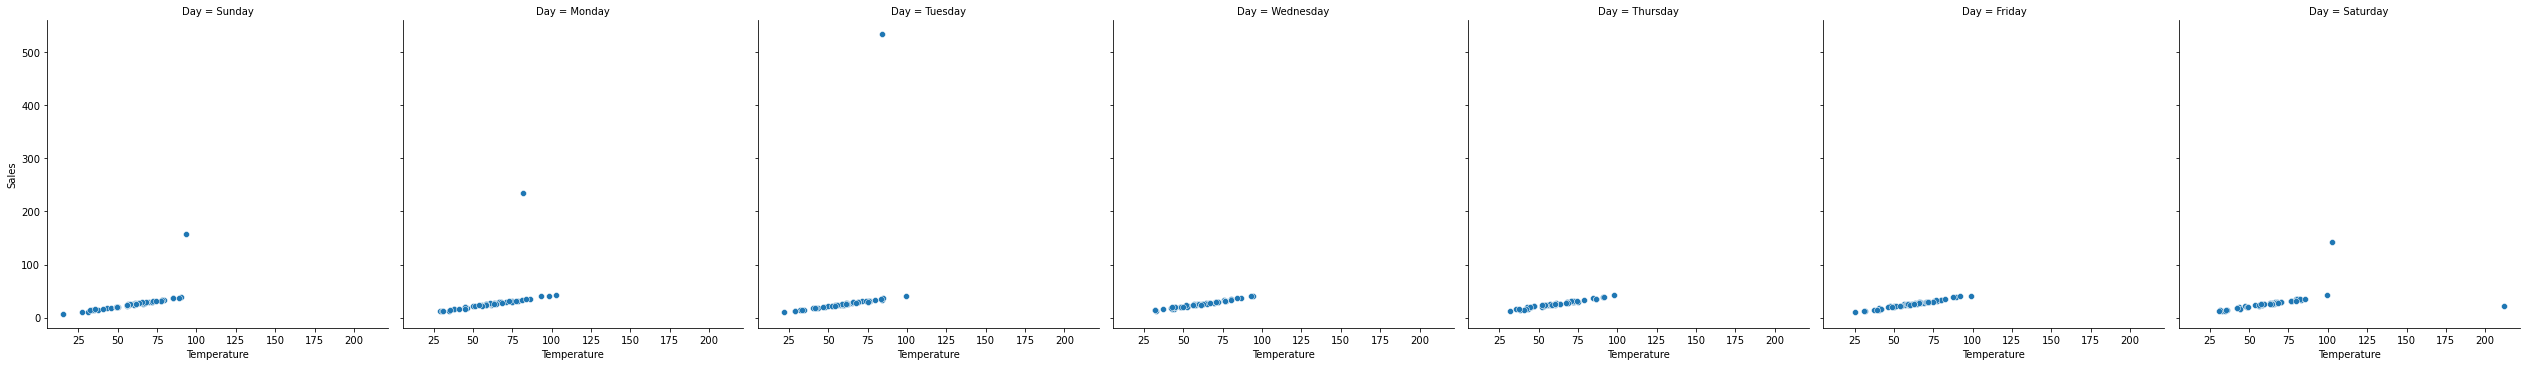

In [7]:
sns.relplot(x='Temperature', y='Sales', col='Day', data=df)

Temperature


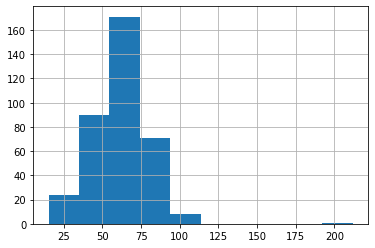

Rainfall


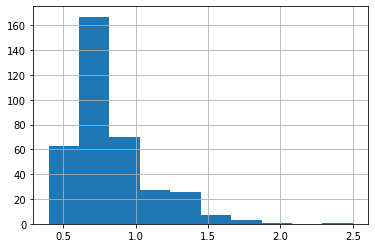

Flyers


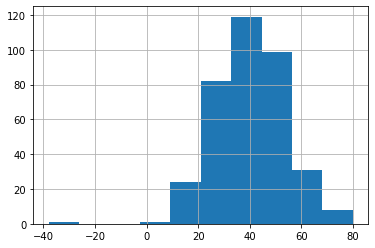

Price


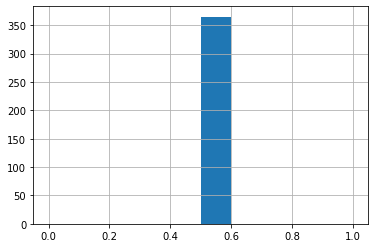

Sales


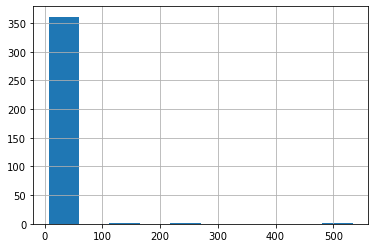

In [8]:
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        df[col].hist()
        print(col)
        plt.show()

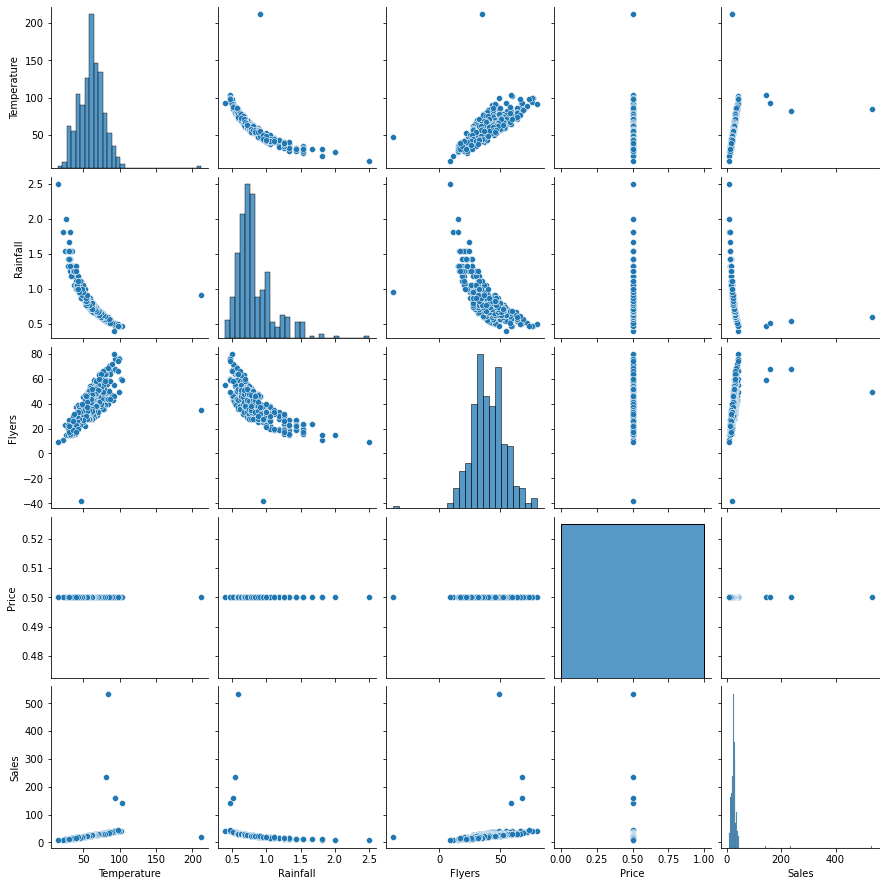

In [9]:
sns.pairplot(df)

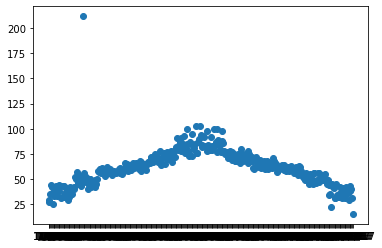

In [10]:
plt.scatter(df.Date, df.Temperature)

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temperature'>

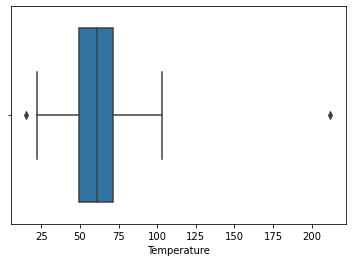

In [11]:
sns.boxplot(df['Temperature'])

- The upper outlier definitely needs to go. The lower one might be able to stay depending on how far it is from the 

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rainfall'>

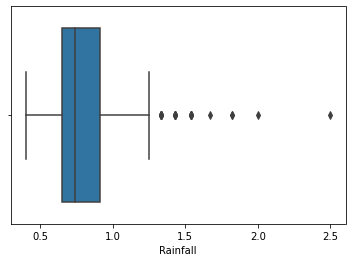

In [12]:
sns.boxplot(df['Rainfall'])

- I think any outliers over 1.5 should probably be taken out

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Flyers'>

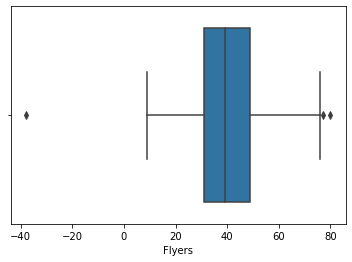

In [13]:
sns.boxplot(df['Flyers'])

- The negative number seems like a typo as there are no other values below zero

In [14]:
df.loc[df['Flyers'] < 0]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20


/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales'>

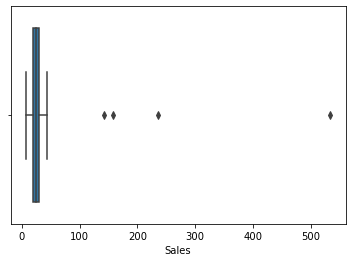

In [15]:
sns.boxplot(df['Sales'])

In [16]:
df.loc[df['Sales'] > 50]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534


- Sales outliers need to be handled for anything over 50 as the bulk of the material is less than that amount. These outliers will skew results

In [17]:
def generate_outlier_bounds(df, column, multiplier=1.5):
    """
    Takes in a dataframe, the column name, and can specify a multiplier (default=1.5). Returns the upper and lower bounds for the
    values in that column that signify outliers.
    """
    q1 = df[column].quantile(.25)
    q3 = df[column].quantile(.75)
    iqr = q3 - q1

    upper = q3 + (multiplier * iqr)
    lower = q1 - (multiplier * iqr)

    return upper, lower

In [18]:
cols = ['Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales']

outliers = generate_outlier_bounds(df, cols, multiplier=1.5)

outliers_df = pd.DataFrame(outliers)

In [19]:
outliers_df

,Temperature,Rainfall,Flyers,Price,Sales
0,104.7,1.30,76.0,0.5,45.0
1,16.7,0.26,4.0,0.5,5.0


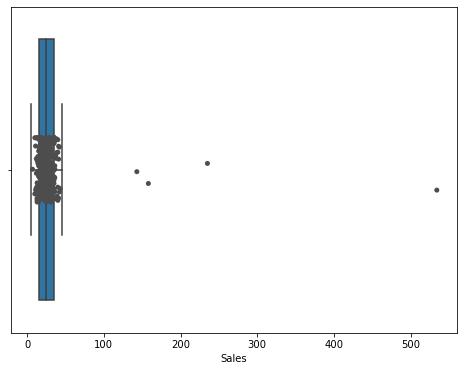

In [21]:

plt.figure(figsize=(8,6))



ax = sns.boxplot(x="Sales", data=outliers_df, whis=np.inf)
ax = sns.stripplot(x="Sales", data=df, color=".3")




-----

<h3>Takeaways for lower and upper outliers with a 3.0 multiplier</h3>





In [22]:
def generate_outlier_bounds(df, column, multiplier=3.0):
    """
    Takes in a dataframe, the column name, and can specify a multiplier (default=1.5). Returns the upper and lower bounds for the
    values in that column that signify outliers.
    """
    q1 = df[column].quantile(.25)
    q3 = df[column].quantile(.75)
    iqr = q3 - q1

    upper = q3 + (multiplier * iqr)
    lower = q1 - (multiplier * iqr)

    return upper, lower

In [23]:
cols = ['Temperature', 'Rainfall', 'Flyers', 'Sales']

outliers = generate_outlier_bounds(df, cols, multiplier=3.0)

outliers_3_df = pd.DataFrame(outliers)

In [24]:
outliers_3_df

,Temperature,Rainfall,Flyers,Sales
0,137.7,1.69,103.0,60.0
1,-16.3,-0.13,-23.0,-10.0


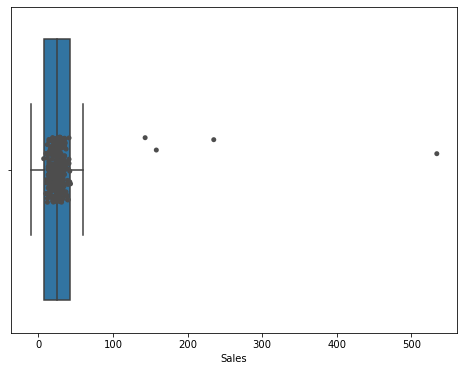

In [25]:
plt.figure(figsize=(8,6))



ax = sns.boxplot(x="Sales", data=outliers_3_df, whis=np.inf)
ax = sns.stripplot(x="Sales", data=df, color=".3")



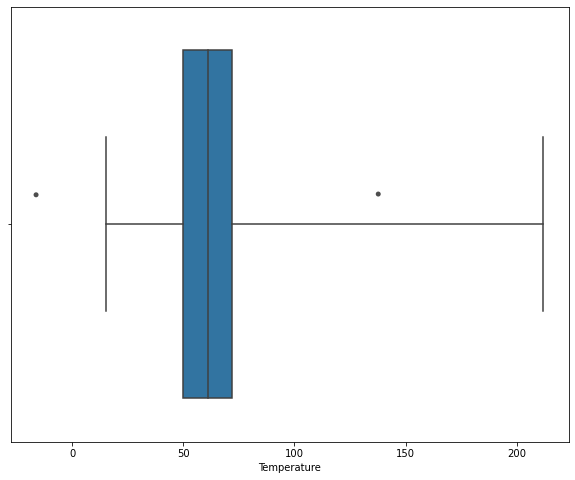

In [26]:
plt.figure(figsize=(10,8))



ax = sns.boxplot(x="Temperature", data=df, whis=np.inf)
ax = sns.stripplot(x="Temperature", data=outliers_3_df, color=".3")



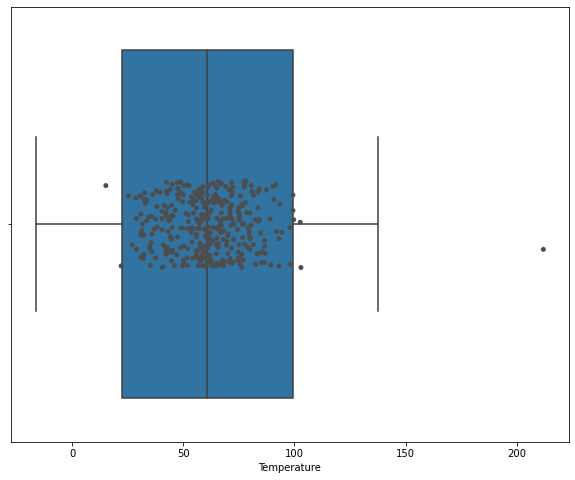

In [27]:
plt.figure(figsize=(10,8))



ax = sns.boxplot(x="Temperature", data=outliers_3_df, whis=np.inf)
ax = sns.stripplot(x="Temperature", data=df, color=".3")